# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Introduction

Traumatic Brain Injuries (TBI) are a significant public health issue, affecting both civilian and military populations. This analysis uses data from the CDC and Veterans Brain Injury Center to explore trends in TBI across different age groups, injury mechanisms, and military branches.

#ChangeYourMind, #braininjuryawarenessmonth

data from (https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-03-24/readme.md)

In [2]:
# 🏃🏽‍♀️ run me! 

library('tidyverse')
library('gganimate')
library('palmerpenguins')
library('gapminder')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# 🏃🏽‍♀️ run me! 

display_gif = function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ..., renderer = gifski_renderer()))
    
    contents = base64enc::base64encode(raw)
    tag = '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

In [4]:
# Load datasets
tbi_military <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_military.csv')

# View dataset structure
glimpse(tbi_military)

Rows: 450 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): service, component, severity
dbl (2): diagnosed, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 450
Columns: 5
$ service   <chr> "Army", "Army", "Army", "Army", "Army", "Army", "Army", "Arm…
$ component <chr> "Active", "Active", "Active", "Active", "Active", "Guard", "…
$ severity  <chr> "Penetrating", "Severe", "Moderate", "Mild", "Not Classifiab…
$ diagnosed <dbl> 189, 102, 709, 5896, 122, 33, 26, 177, 1332, 29, 12, 11, 63,…
$ year      <dbl> 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, …


In [5]:
head(tbi_military)

service component severity         diagnosed year
1 Army    Active    Penetrating       189      2006
2 Army    Active    Severe            102      2006
3 Army    Active    Moderate          709      2006
4 Army    Active    Mild             5896      2006
5 Army    Active    Not Classifiable  122      2006
6 Army    Guard     Penetrating        33      2006


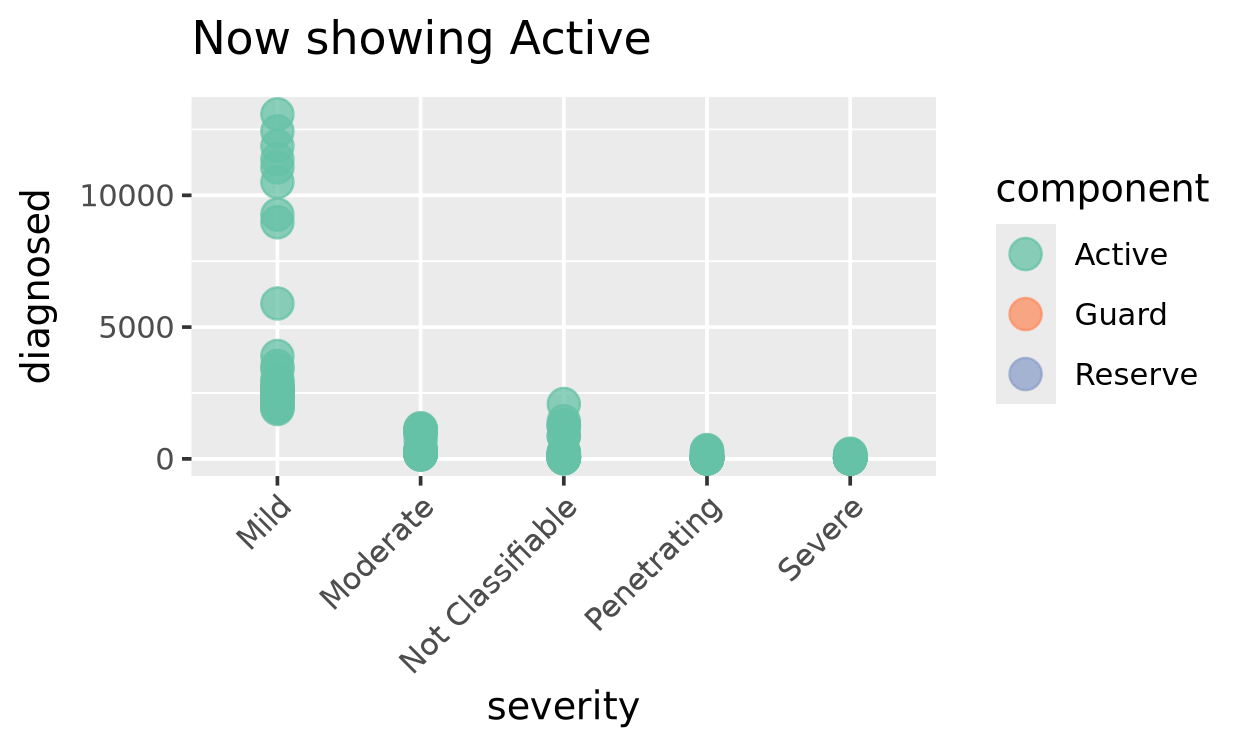

In [6]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)


# 결측치 제거
tbi_military_clean = tbi_military %>%
  filter(!is.na(severity), !is.na(diagnosed), !is.na(component))

# 애니메이션 생성
anim1 = ggplot(tbi_military_clean, aes(x = severity, y = diagnosed, colour = component)) +
  geom_point(size = 4, alpha = 0.75) +
  scale_color_brewer(palette = 'Set2') +
  ggtitle('Now showing {closest_state}') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # x축 텍스트 회전
  transition_states(component, transition_length = 2, state_length = 1) +
  enter_grow() +
  exit_shrink()

# 애니메이션 출력
display_gif(anim1, width = 5, height = 3, units = 'in', res = 250)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”



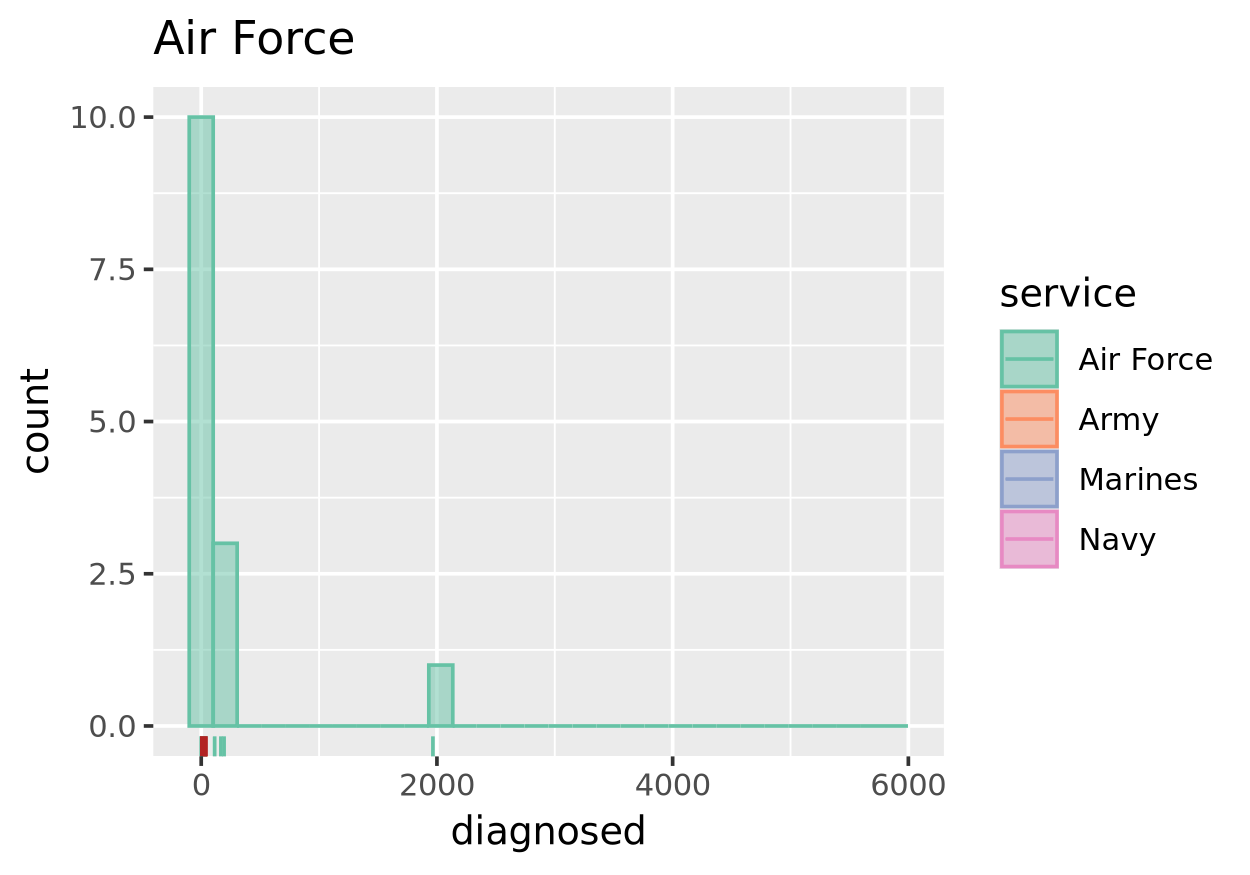

In [16]:
# 🏃🏽‍♀️ run me!

anim2 = ggplot(tbi_military_clean, aes(x = diagnosed, fill = service, color = service)) + 
    geom_histogram(position = 'identity', alpha = 0.5) +
    scale_color_brewer(palette = 'Set2') +
    scale_fill_brewer(palette = 'Set2') +
    geom_rug(mapping = aes(group = service)) +
    geom_rug(mapping = aes(group = service), data = tbi_military_clean |> filter(severity == c("Penetrating", "Severe")), color = 'firebrick', size = 1) +
    transition_states(service) +      # 🆕
    exit_shrink() + enter_grow() + # 🆕
    ggtitle('{closest_state}')     # 🆕

display_gif(anim2, width = 5, height = 3.5, units = 'in', res = 250)

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_rect()`).”


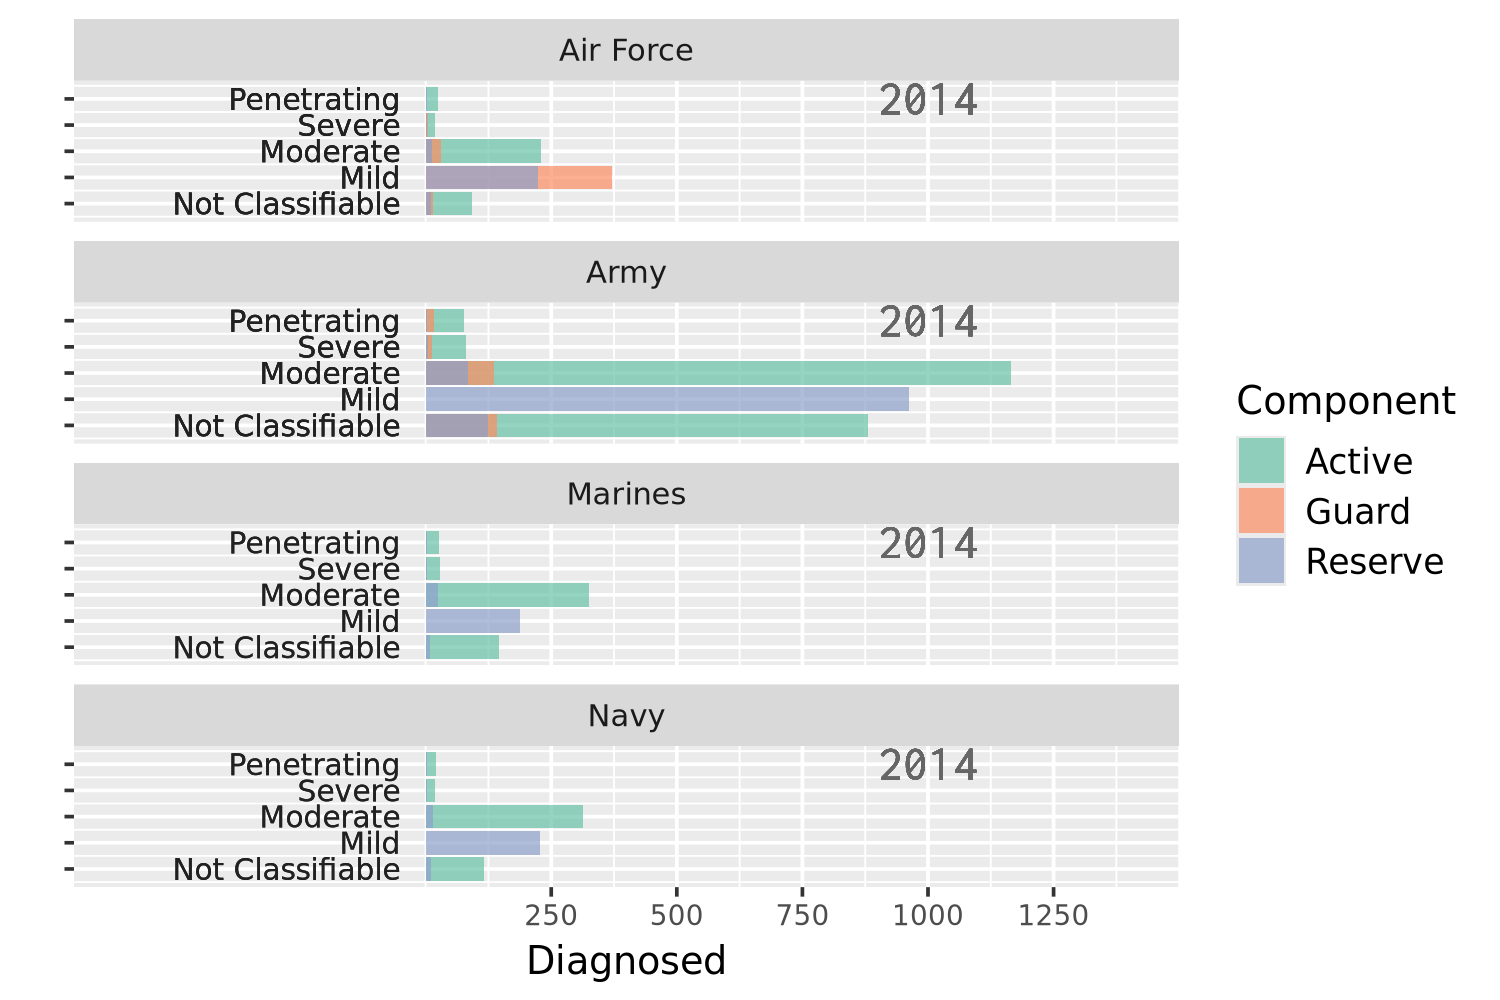

In [28]:
# 데이터 전처리
tbi_military_clean2 <- tbi_military %>%
  filter(!is.na(diagnosed), 
         !is.na(severity), 
         !is.na(component),
         !is.na(service), 
         !is.na(year), 
         diagnosed >= 0,       # diagnosed가 0 이상인지 확인
         year == 2014) %>%
  mutate(severity = factor(severity, levels = rev(unique(severity)))) # y축 순서 반전

# 애니메이션 생성
anim3 <- ggplot(tbi_military_clean2,  
              aes(xmin = 0,  
                  xmax = diagnosed,
                  ymin = as.numeric(severity) - 0.45,  
                  ymax = as.numeric(severity) + 0.45,
                  fill = component)) +  
    geom_rect(alpha = .7) +  
    geom_text(aes(x = -50, 
                  y = as.numeric(severity), 
                  label = severity),  # severity 이름 추가
              col = "gray13",  
              hjust = "right",  
              size = 3) + 
    geom_text(aes(x = 1000, 
                  y = 5, 
                  label = as.character(year)),
              family = "courier",  
              size = 5, col = "grey40") +
    scale_fill_brewer(palette = "Set2") +   
    scale_x_continuous(limits = c(-600, 1400), 
                       breaks = c(250, 500, 750, 1000, 1250)) +  
    labs(x = 'Diagnosed', y = '', fill = 'Component') +  
    # theme_minimal() +
    theme(legend.text = element_text(size = 10), 
          legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(),  
          axis.text.x = element_text(size = 8)) +
    facet_wrap(~service, ncol = 1, scales = "free_y") # Service별로 분리된 패널

# 결과 출력
anim3


Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_tex


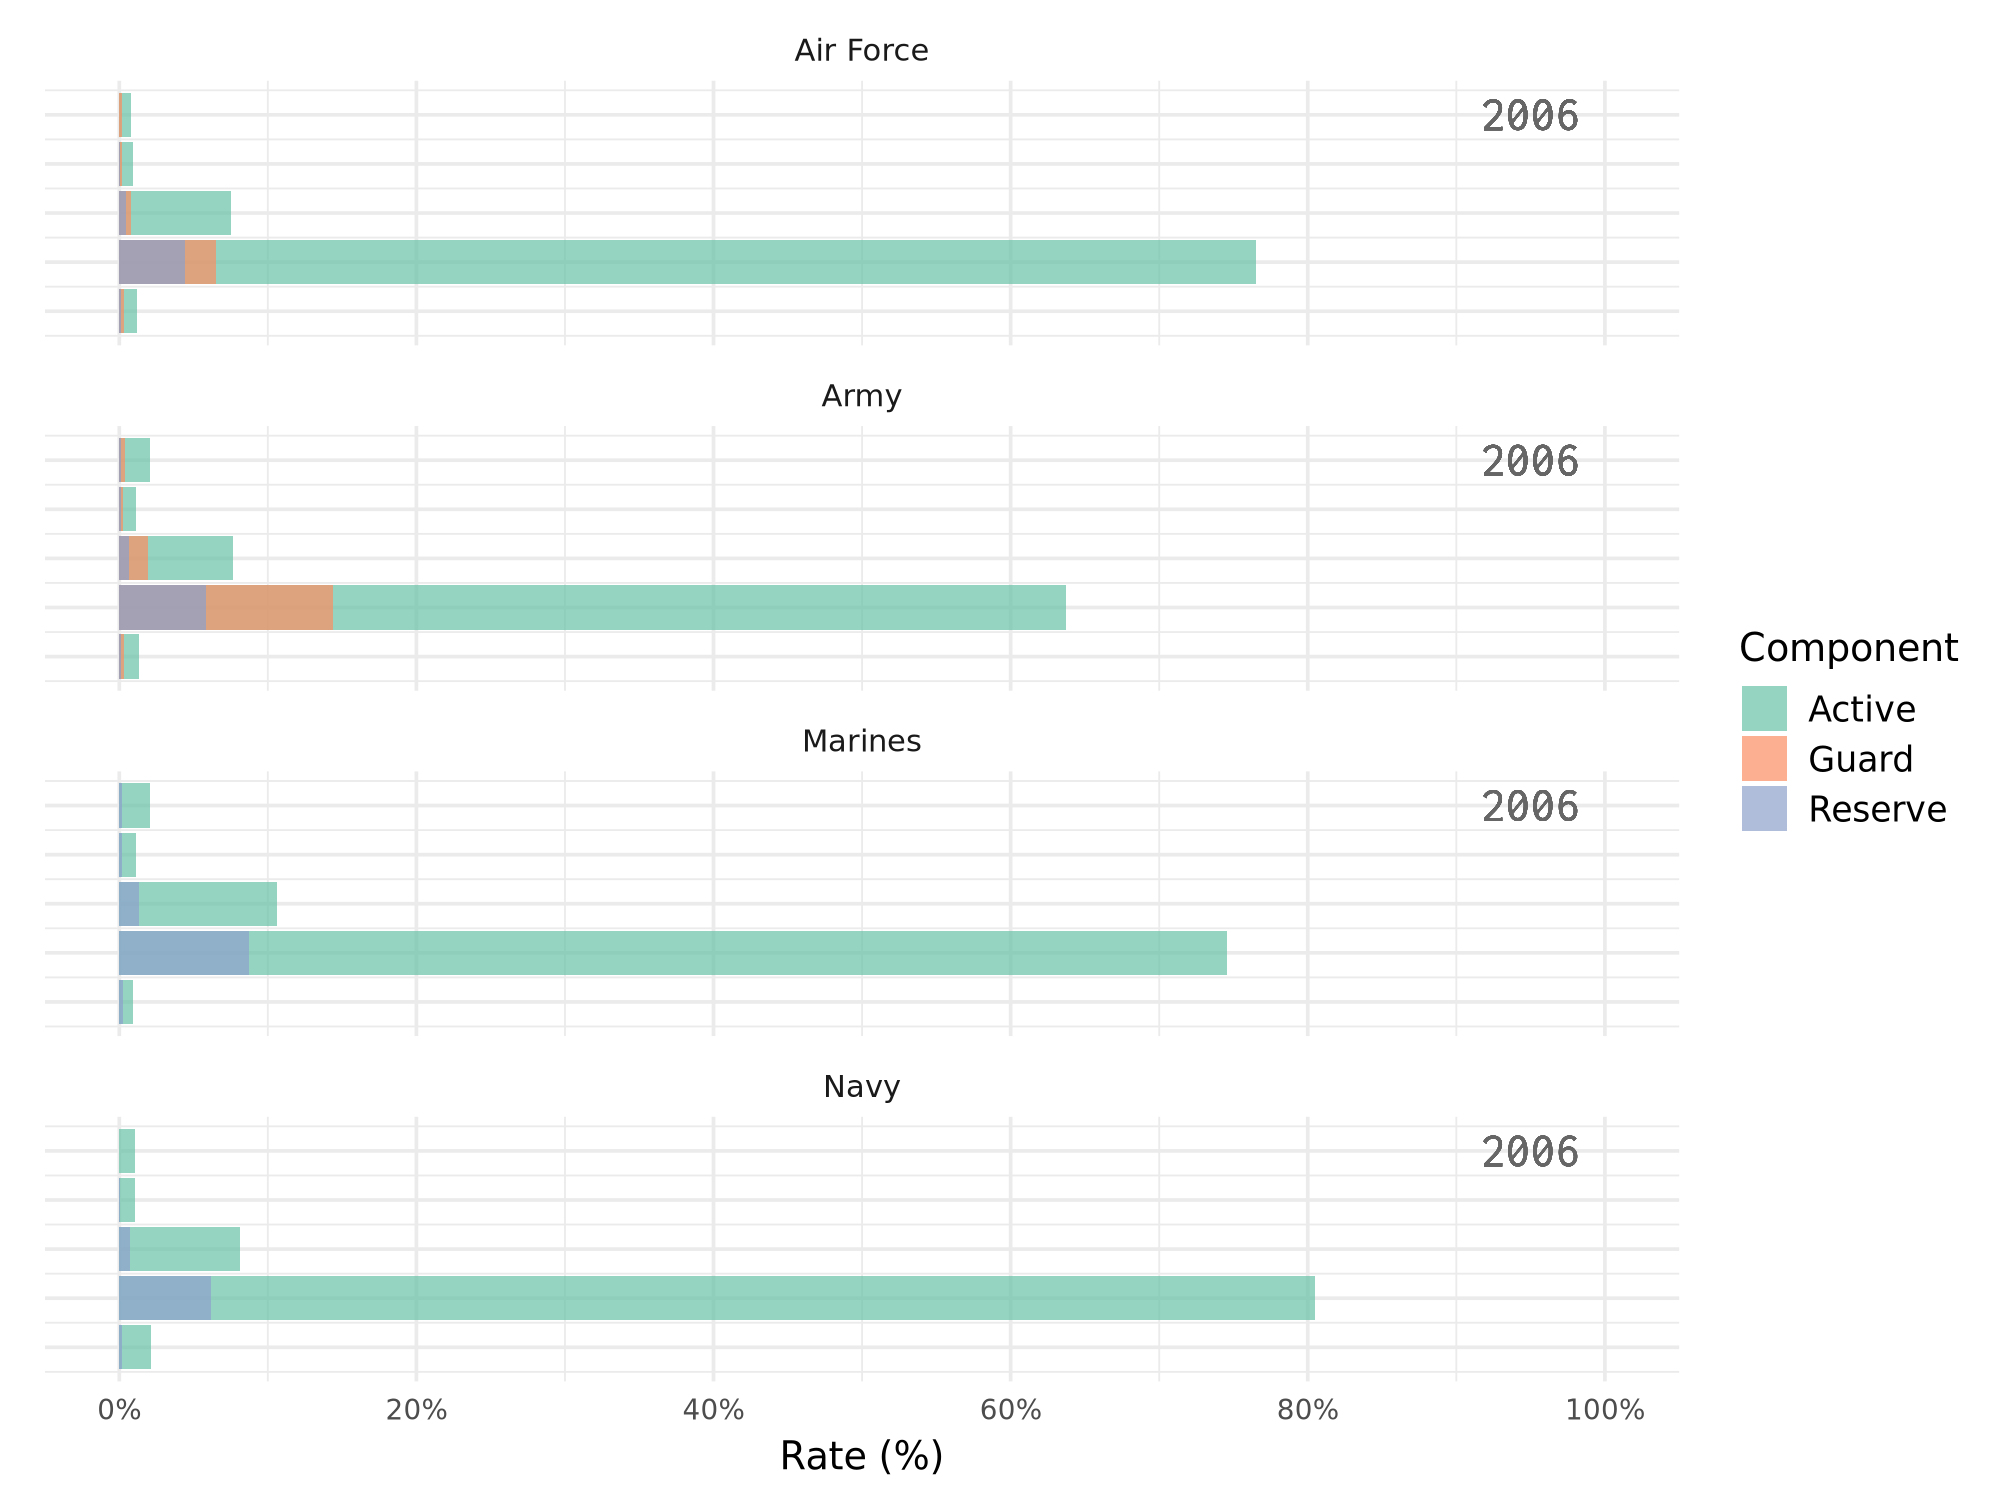

In [36]:
# 데이터 전처리: 전체 연도 포함
tbi_military_clean2 <- tbi_military %>%
  filter(!is.na(diagnosed), 
         !is.na(severity), 
         !is.na(component),
         !is.na(service), 
         !is.na(year), 
         diagnosed >= 0) %>%
  group_by(service, year) %>%  # Service와 연도별 그룹화
  mutate(total_diagnosed = sum(diagnosed, na.rm = TRUE),  # 총 diagnosed 계산
         rate = diagnosed / total_diagnosed * 100) %>%  # 비율 계산
  ungroup() %>%
  mutate(severity = factor(severity, levels = rev(unique(severity)))) # y축 순서 반전

# 애니메이션 생성
anim3 <- ggplot(tbi_military_clean2,  
              aes(xmin = 0,  
                  xmax = rate,  # x값을 diagnosed -> rate로 변경
                  ymin = as.numeric(severity) - 0.45,  
                  ymax = as.numeric(severity) + 0.45,
                  fill = component)) +  
    geom_rect(alpha = .7) +  
    geom_text(aes(x = -5,  # x값 조정
                  y = as.numeric(severity), 
                  label = severity),  # severity 이름 추가
              col = "gray13",  
              hjust = "right",  
              size = 3) + 
    geom_text(aes(x = 95,  # x축 오른쪽에 연도 표시
                  y = 5, 
                  label = as.character(year)),
              family = "courier",  
              size = 5, col = "grey40") +
    scale_fill_brewer(palette = "Set2") +   
    scale_x_continuous(limits = c(0, 100),  # 비율에 맞게 x축 범위 조정
                       breaks = seq(0, 100, by = 20),  # 적절한 눈금 생성
                       labels = scales::label_percent(scale = 1)) +  # 퍼센트 형식
    labs(x = 'Rate (%)', y = '', fill = 'Component') +  
    theme_minimal() +
    theme(legend.text = element_text(size = 10), 
          legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(),  
          axis.text.x = element_text(size = 8)) +
    facet_wrap(~service, ncol = 1, scales = "free_y") + # Service별로 분리된 패널
    transition_states(year, transition_length = 2, state_length = 1) +  # 연도별 애니메이션 전환
    enter_fade() + 
    exit_fade()

# 애니메이션 출력
display_gif(anim3, height = 6, width = 8, units = 'in', res = 250, nframes = 300, fps = 20)


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_rect()`).”
W


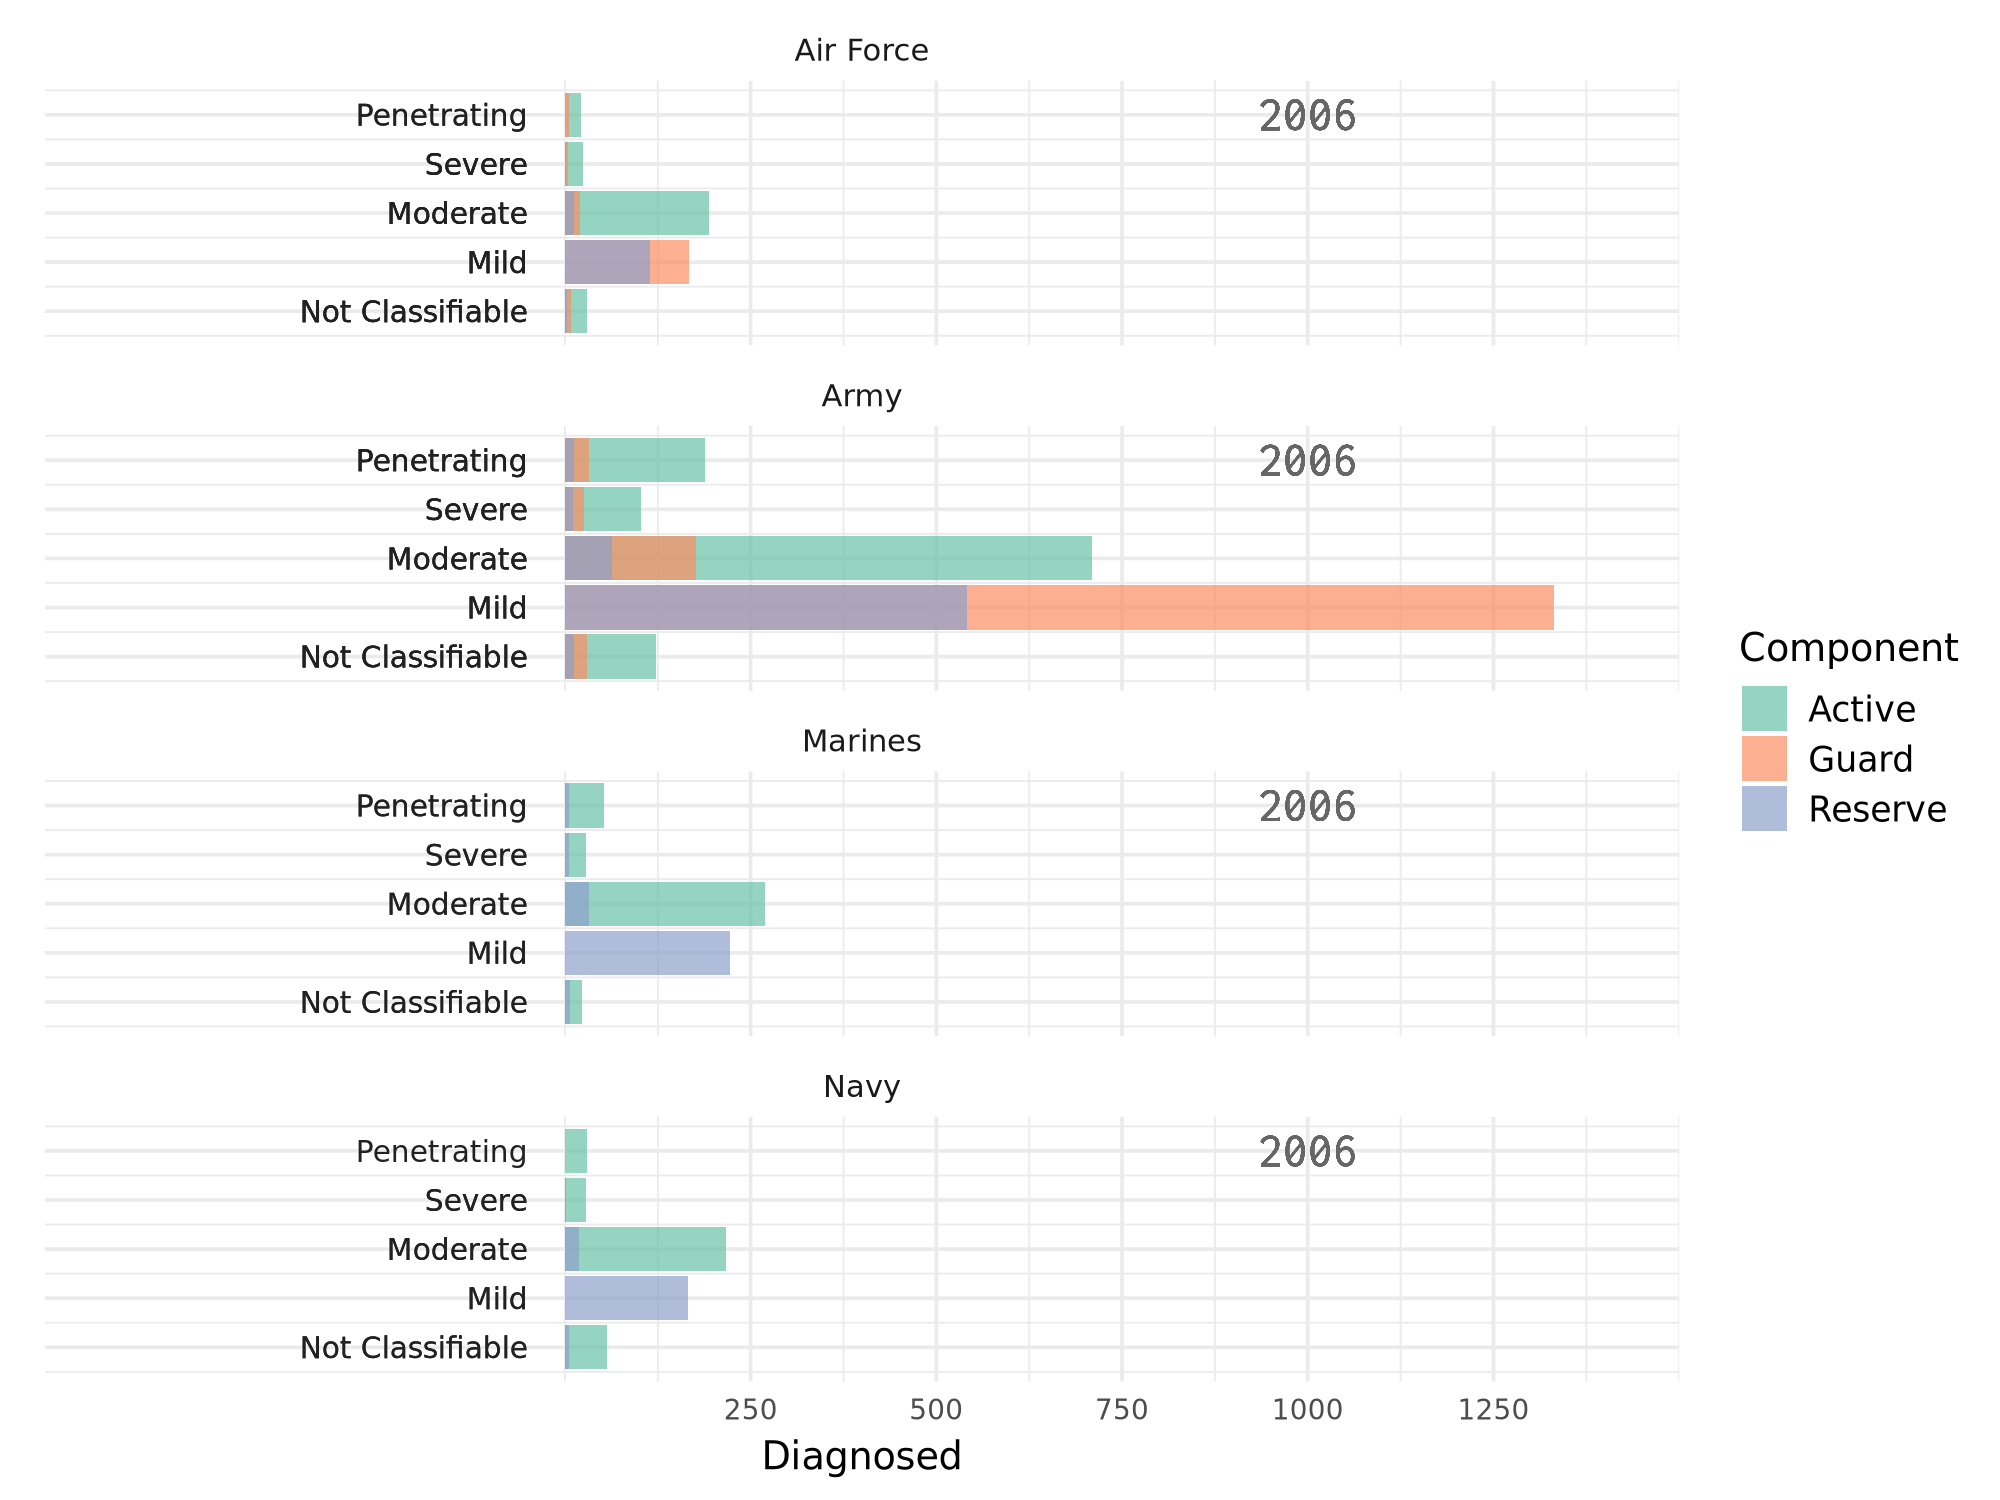

In [ ]:
# 데이터 전처리: 전체 연도 포함
tbi_military_clean2 <- tbi_military %>%
  filter(!is.na(diagnosed), 
         !is.na(severity), 
         !is.na(component),
         !is.na(service), 
         !is.na(year), 
         diagnosed >= 0) %>%   # diagnosed가 0 이상인지 확인
  mutate(severity = factor(severity, levels = rev(unique(severity)))) # y축 순서 반전

# 애니메이션 생성
anim3 <- ggplot(tbi_military_clean2,  
              aes(xmin = 0,  
                  xmax = diagnosed,
                  ymin = as.numeric(severity) - 0.45,  
                  ymax = as.numeric(severity) + 0.45,
                  fill = component)) +  
    geom_rect(alpha = .7) +  
    geom_text(aes(x = -50, 
                  y = as.numeric(severity), 
                  label = severity),  # severity 이름 추가
              col = "gray13",  
              hjust = "right",  
              size = 3) + 
    geom_text(aes(x = 1000, 
                  y = 5, 
                  label = as.character(year)),
              family = "courier",  
              size = 5, col = "grey40") +
    scale_fill_brewer(palette = "Set2") +   
    scale_x_continuous(limits = c(-600, 1400), 
                       breaks = c(250, 500, 750, 1000, 1250)) +  
    labs(x = 'Diagnosed', y = '', fill = 'Component') +  
    theme_minimal() +
    theme(legend.text = element_text(size = 10), 
          legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(),  
          axis.text.x = element_text(size = 8)) +
    facet_wrap(~service, ncol = 1, scales = "free_y") + # Service별로 분리된 패널
    transition_states(year, transition_length = 2, state_length = 1) +  # 연도별 애니메이션 전환
    enter_fade() + 
    exit_fade()

# 애니메이션 출력
display_gif(anim3, height = 6, width = 8, units = 'in', res = 250, nframes = 300, fps = 20)


Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_tex


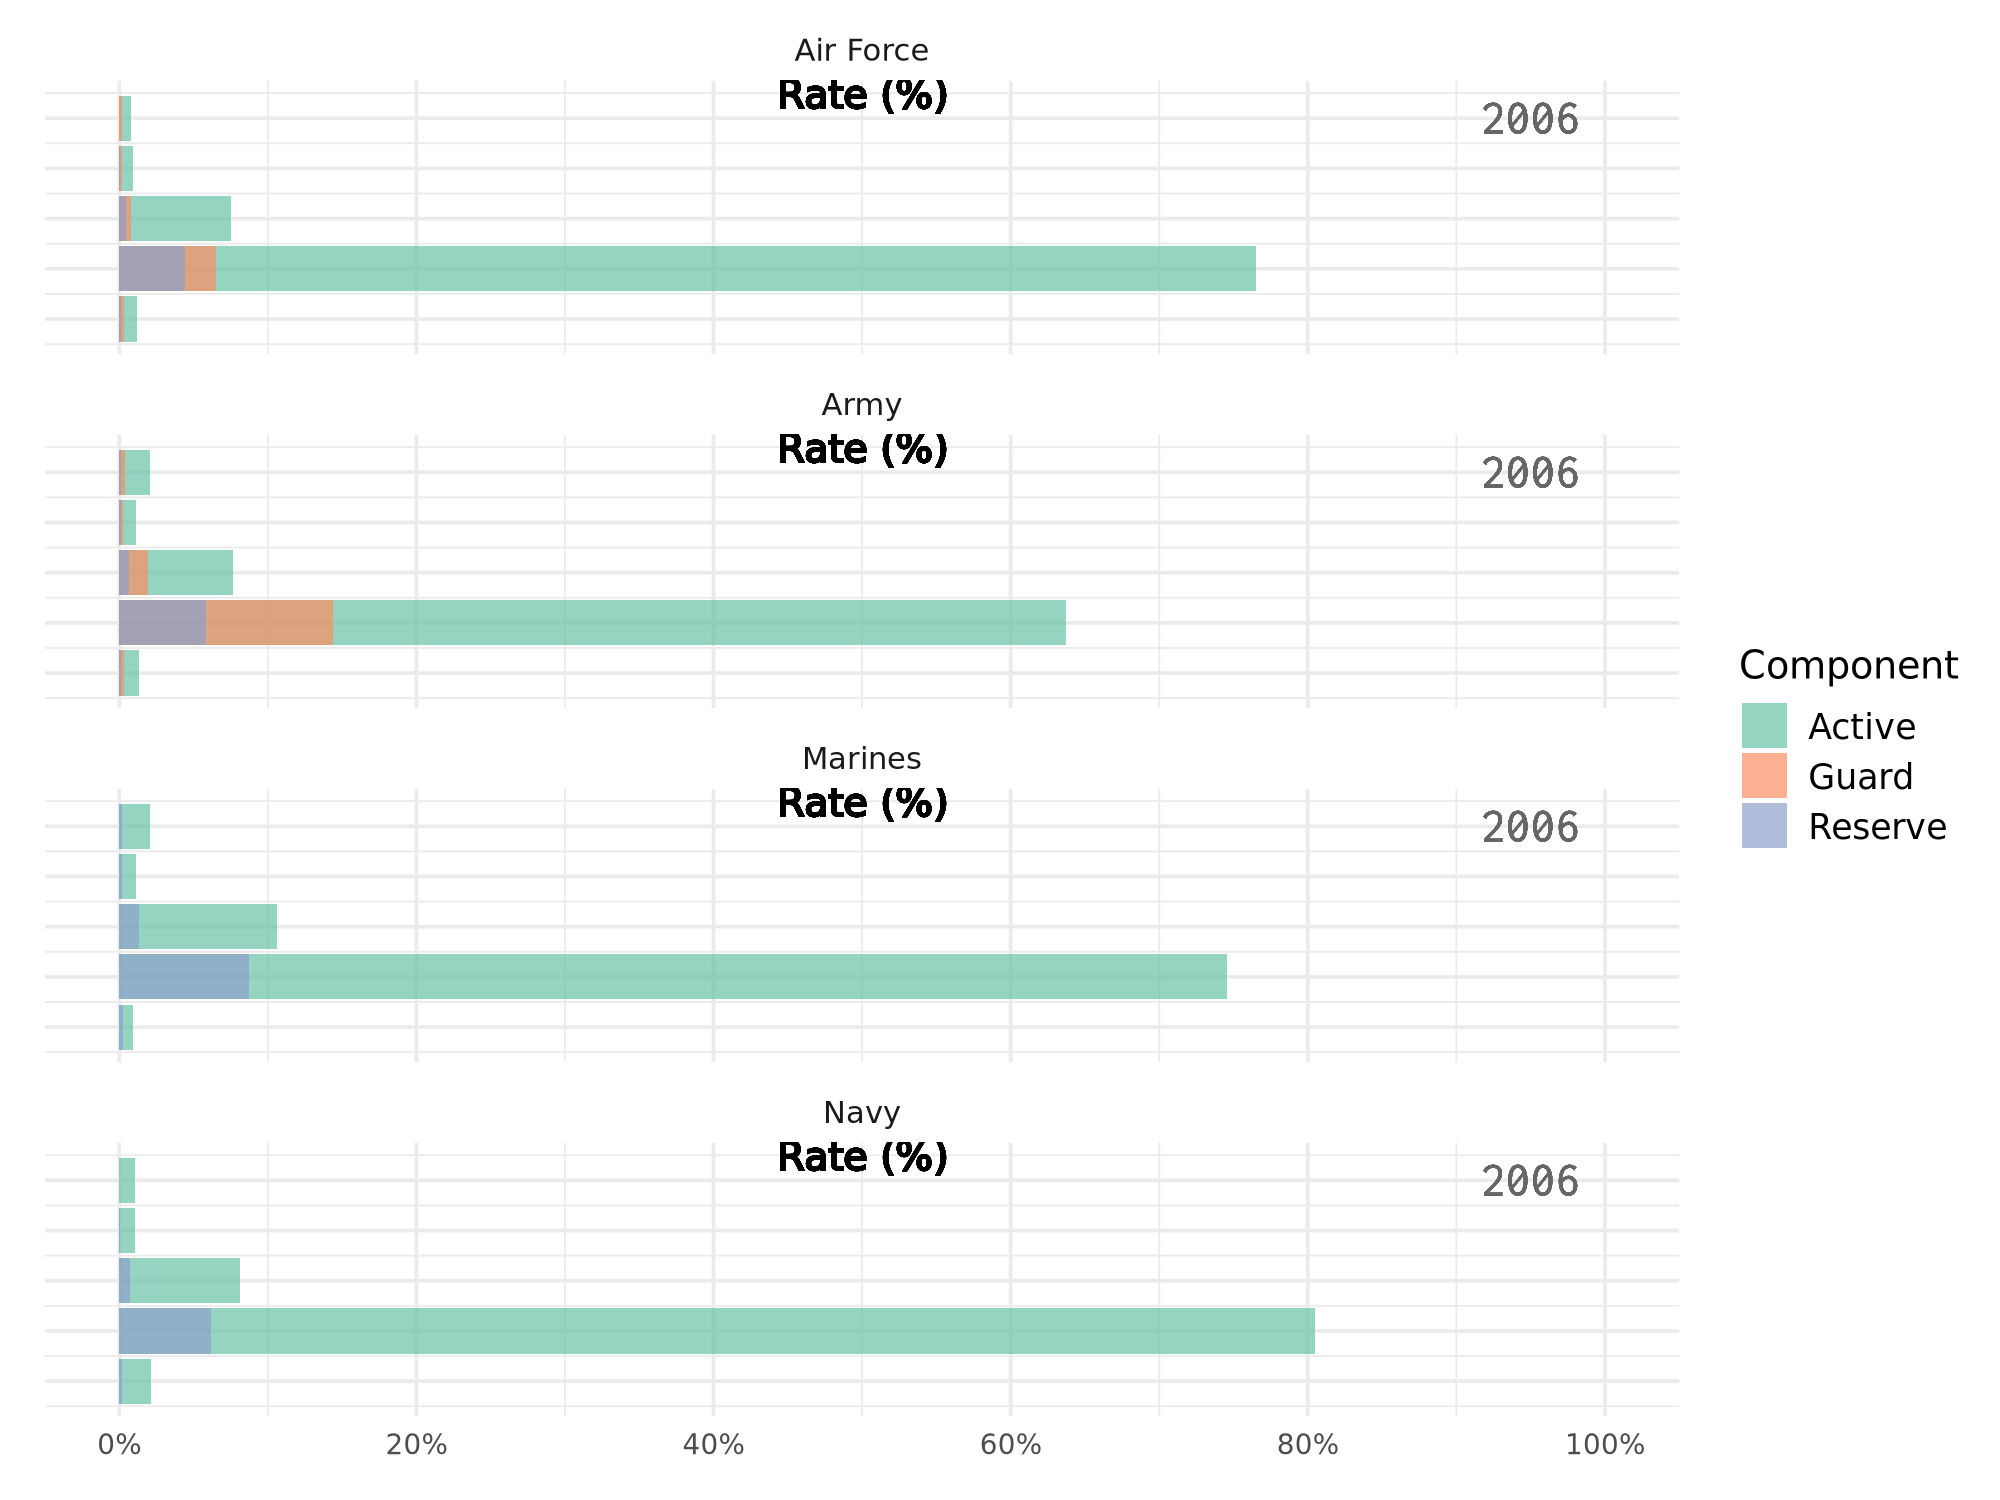

In [ ]:
# 데이터 전처리: 전체 연도 포함
tbi_military_clean2 <- tbi_military %>%
  filter(!is.na(diagnosed), 
         !is.na(severity), 
         !is.na(component),
         !is.na(service), 
         !is.na(year), 
         diagnosed >= 0) %>%
  group_by(service, year) %>%
  mutate(total_diagnosed = sum(diagnosed, na.rm = TRUE),  # 총 diagnosed 계산
         rate = diagnosed / total_diagnosed * 100) %>%  # 비율 계산
  ungroup() %>%
  mutate(severity = factor(severity, levels = rev(unique(severity)))) # y축 순서 반전

# 애니메이션 생성
anim3 <- ggplot(tbi_military_clean2,  
              aes(xmin = 0,  
                  xmax = rate,  # x값을 diagnosed -> rate로 변경
                  ymin = as.numeric(severity) - 0.45,  
                  ymax = as.numeric(severity) + 0.45,
                  fill = component)) +  
    geom_rect(alpha = .7) +  
    geom_text(data = tbi_military_clean2 %>% filter(!is.na(rate), !is.na(severity)),  # 결측값 제외
              aes(x = -5,  # x값 조정
                  y = as.numeric(severity), 
                  label = severity),  # severity 이름 추가
              col = "gray13",  
              hjust = "right",  
              size = 3) + 
    geom_text(data = tbi_military_clean2 %>% filter(!is.na(rate)),  # 결측값 제외
              aes(x = 95,  # x축 오른쪽에 연도 표시
                  y = 5, 
                  label = as.character(year)),
              family = "courier",  
              size = 5, col = "grey40") +
    # 추가: x축 라벨 추가
    geom_text(data = tbi_military_clean2 %>% filter(!is.na(rate)), 
              aes(x = 50, 
                  y = max(as.numeric(severity)) + 0.5, 
                  label = "Rate (%)"), 
              size = 4, col = "black", fontface = "bold") +
    # 추가: y축 라벨 추가
    geom_text(data = tbi_military_clean2 %>% filter(!is.na(rate)), 
              aes(x = -10, 
                  y = max(as.numeric(severity)), 
                  label = "Severity"), 
              size = 4, col = "black", fontface = "bold", angle = 90) +
    scale_fill_brewer(palette = "Set2") +   
    scale_x_continuous(limits = c(0, 100),  # 비율에 맞게 x축 범위 조정
                       breaks = seq(0, 100, by = 20),  # 적절한 눈금 생성
                       labels = scales::label_percent(scale = 1)) +  # 퍼센트 형식
    labs(x = '', y = '', fill = 'Component') +  # 축 라벨은 직접 geom_text로 표시
    theme_minimal() +
    theme(legend.text = element_text(size = 10), 
          legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(),  
          axis.text.x = element_text(size = 8)) +
    facet_wrap(~service, ncol = 1, scales = "free_y") + # Service별로 분리된 패널
    transition_states(year, transition_length = 2, state_length = 1) +  # 연도별 애니메이션 전환
    enter_fade() + 
    exit_fade()

# 애니메이션 출력
display_gif(anim3, height = 6, width = 8, units = 'in', res = 250, nframes = 300, fps = 20)



Warning message:
“Removed 50 rows containing missing values or values outside the scale range
(`geom_rect()`).”
Warning message:
“Removed 50 rows containing missing values or values outside the scale range
(`geom_text()`).”


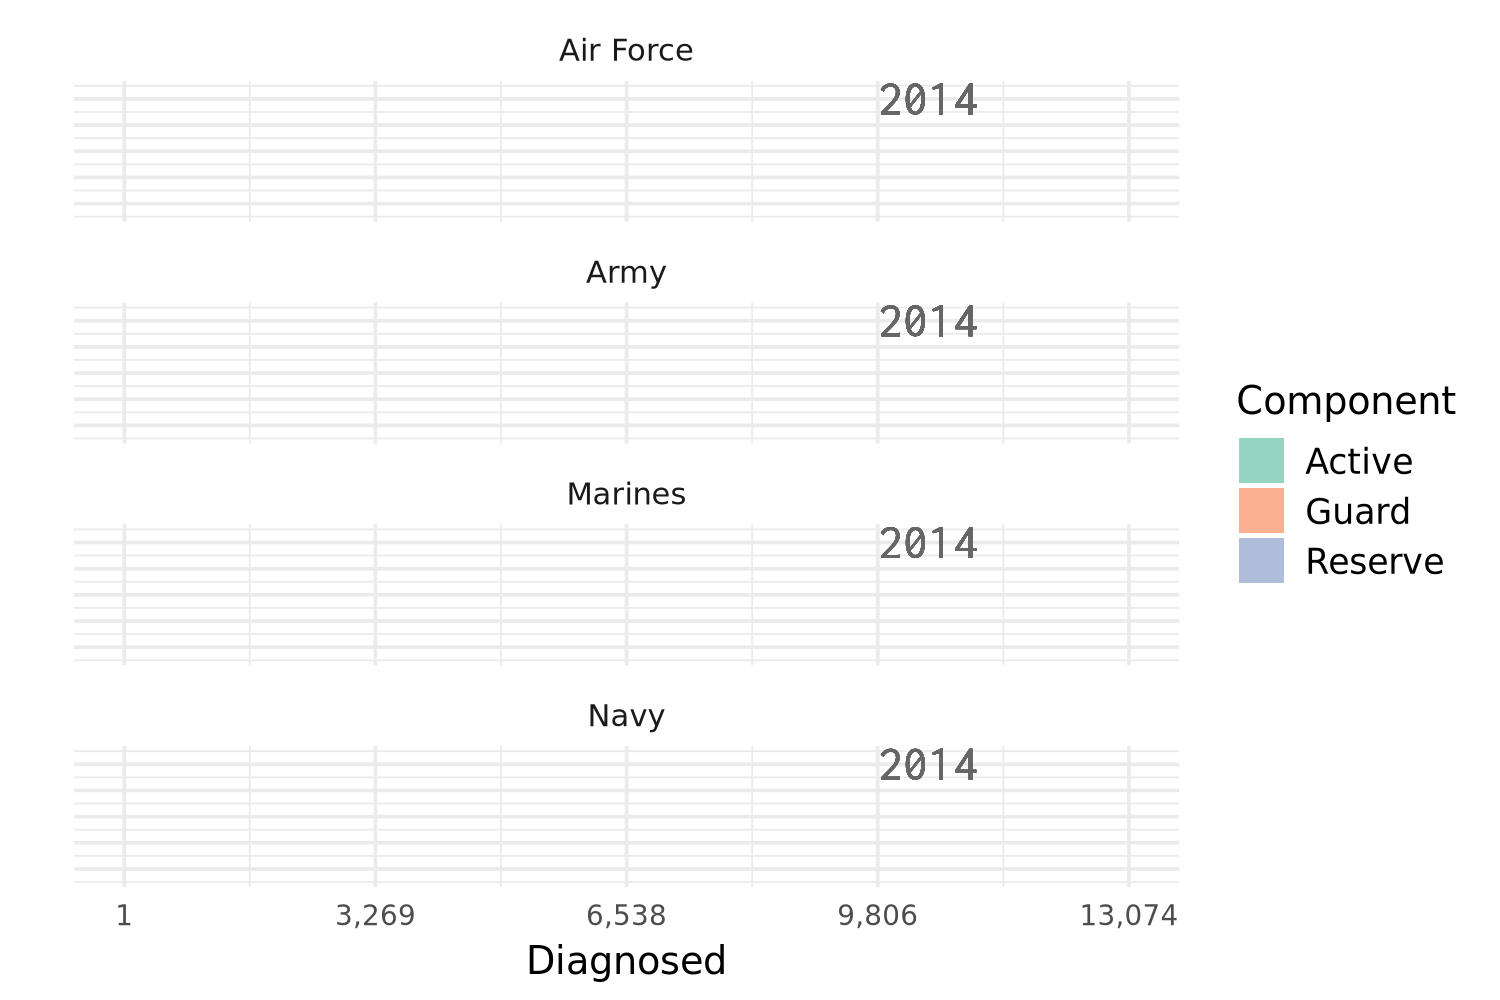

In [40]:
# 데이터 전처리
tbi_military_clean2 <- tbi_military %>%
  filter(!is.na(diagnosed), 
         !is.na(severity), 
         !is.na(component),
         !is.na(service), 
         !is.na(year), 
         diagnosed >= 0,       # diagnosed가 0 이상인지 확인
         year == 2014) %>%
  mutate(severity = factor(severity, levels = rev(unique(severity)))) # y축 순서 반전

# diagnosed의 최솟값과 최댓값 설정
min_diagnosed <- 1
max_diagnosed <- 13074

# 애니메이션 생성
anim3 <- ggplot(tbi_military_clean2,  
              aes(xmin = 0,  
                  xmax = diagnosed,
                  ymin = as.numeric(severity) - 0.45,  
                  ymax = as.numeric(severity) + 0.45,
                  fill = component)) +  
    geom_rect(alpha = .7) +  
    geom_text(aes(x = min_diagnosed - 100,  # x축 라벨 조정
                  y = as.numeric(severity), 
                  label = severity),  # severity 이름 추가
              col = "gray13",  
              hjust = "right",  
              size = 3) + 
    geom_text(aes(x = max_diagnosed * 0.8,  # x축 최대값을 기준으로 조정
                  y = 5, 
                  label = as.character(year)),
              family = "courier",  
              size = 5, col = "grey40") +
    scale_fill_brewer(palette = "Set2") +   
    scale_x_continuous(limits = c(min_diagnosed, max_diagnosed),  # diagnosed 범위로 x축 설정
                       breaks = seq(min_diagnosed, max_diagnosed, length.out = 5),  # x축 눈금 자동 생성
                       labels = scales::label_comma()) +  # 라벨 형식 조정
    labs(x = 'Diagnosed', y = '', fill = 'Component') +  
    theme_minimal() +
    theme(legend.text = element_text(size = 10), 
          legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(),  
          axis.text.x = element_text(size = 8)) +
    facet_wrap(~service, ncol = 1, scales = "free_y") # Service별로 분리된 패널

# 결과 출력
anim3


In [34]:
# 데이터 읽기
tbi_military <- read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_military.csv")

# diagnosed 열의 최솟값과 최댓값 계산
min_diagnosed <- min(tbi_military$diagnosed, na.rm = TRUE)
max_diagnosed <- max(tbi_military$diagnosed, na.rm = TRUE)

# 결과 출력
cat("diagnosed의 최솟값:", min_diagnosed, "\n")
cat("diagnosed의 최댓값:", max_diagnosed, "\n")

diagnosed의 최솟값: 1 
diagnosed의 최댓값: 13074 


In [ ]:
str(tbi_military_clean)

tibble [48 × 5] (S3: tbl_df/tbl/data.frame)
 $ service  : chr [1:48] "Army" "Army" "Army" "Army" ...
 $ component: chr [1:48] "Active" "Active" "Active" "Active" ...
 $ severity : Factor w/ 5 levels "Penetrating",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ diagnosed: num [1:48] 189 102 709 5896 122 ...
 $ year     : num [1:48] 2006 2006 2006 2006 2006 ...
